exercise 1.1

In [1]:
import pandas as pd
import numpy as np
from io import StringIO

csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))

print("Original DataFrame:")
print(df)

print("\nMissing values in each column (initial):")
print(df.isnull().sum())


df.loc[0, 'A'] = np.nan
df.loc[2, 'B'] = np.nan

print("\nModified DataFrame with more missing values:")
print(df)

print("\nMissing values in each column (after modification):")
print(df.isnull().sum())


Original DataFrame:
      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN

Missing values in each column (initial):
A    0
B    0
C    1
D    1
dtype: int64

Modified DataFrame with more missing values:
      A    B     C    D
0   NaN  2.0   3.0  4.0
1   5.0  6.0   NaN  8.0
2  10.0  NaN  12.0  NaN

Missing values in each column (after modification):
A    1
B    1
C    1
D    1
dtype: int64


Exercise 1.2

In [2]:
from io import StringIO


csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))

# Add more missing values
df.loc[0, 'A'] = np.nan
df.loc[2, 'B'] = np.nan

print("Original DataFrame with missing values:")
print(df)

# Step 2: Eliminating Missing Values in different ways

# Drop rows with ANY missing values
print("\nDrop rows with any missing values:")
print(df.dropna(axis=0))

# Drop columns with ANY missing values
print("\nDrop columns with any missing values:")
print(df.dropna(axis=1))

# Drop rows where ALL values are missing
print("\nDrop rows where all values are missing:")
print(df.dropna(how='all'))

# Drop rows with fewer than 4 non-missing values
print("\nDrop rows with fewer than 4 non-missing values:")
print(df.dropna(thresh=4))

# Drop rows where column 'C' is missing
print("\nDrop rows where 'C' is missing:")
print(df.dropna(subset=['C']))

Original DataFrame with missing values:
      A    B     C    D
0   NaN  2.0   3.0  4.0
1   5.0  6.0   NaN  8.0
2  10.0  NaN  12.0  NaN

Drop rows with any missing values:
Empty DataFrame
Columns: [A, B, C, D]
Index: []

Drop columns with any missing values:
Empty DataFrame
Columns: []
Index: [0, 1, 2]

Drop rows where all values are missing:
      A    B     C    D
0   NaN  2.0   3.0  4.0
1   5.0  6.0   NaN  8.0
2  10.0  NaN  12.0  NaN

Drop rows with fewer than 4 non-missing values:
Empty DataFrame
Columns: [A, B, C, D]
Index: []

Drop rows where 'C' is missing:
      A    B     C    D
0   NaN  2.0   3.0  4.0
2  10.0  NaN  12.0  NaN


Drop Rows when:
 You have many rows and only a few contain missing values.
 Each row represents an independent sample, and losing some won’t harm the dataset.

Drop Columns when:
 A column has too many missing values (e.g., >50%).
 The column is not important for the analysis or model.


exercise 1.3

In [3]:
import pandas as pd
import numpy as np
from io import StringIO
from sklearn.impute import SimpleImputer

# Step 1: Create DataFrame with missing values
csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))

# Add more missing values
df.loc[0, 'A'] = np.nan
df.loc[2, 'B'] = np.nan

print("Original DataFrame with missing values:")
print(df)

# Step 2: Imputation with different strategies

# Mean strategy
imr_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_mean = imr_mean.fit_transform(df.values)
print("\nImputation with mean:")
print(imputed_mean)

# Median strategy
imr_median = SimpleImputer(missing_values=np.nan, strategy='median')
imputed_median = imr_median.fit_transform(df.values)
print("\nImputation with median:")
print(imputed_median)

# Most frequent strategy
imr_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputed_freq = imr_freq.fit_transform(df.values)
print("\nImputation with most frequent:")
print(imputed_freq)


Original DataFrame with missing values:
      A    B     C    D
0   NaN  2.0   3.0  4.0
1   5.0  6.0   NaN  8.0
2  10.0  NaN  12.0  NaN

Imputation with mean:
[[ 7.5  2.   3.   4. ]
 [ 5.   6.   7.5  8. ]
 [10.   4.  12.   6. ]]

Imputation with median:
[[ 7.5  2.   3.   4. ]
 [ 5.   6.   7.5  8. ]
 [10.   4.  12.   6. ]]

Imputation with most frequent:
[[ 5.  2.  3.  4.]
 [ 5.  6.  3.  8.]
 [10.  2. 12.  4.]]


Why might ‘most_frequent’ be useful for categorical data?

Categorical features (like Gender = Male/Female, Color = Red/Blue/Green) don’t have a meaningful mean or median.

Using most_frequent replaces missing values with the most common category (mode), which is often a reasonable assumption.

Example: If 80% of users are “Male”, imputing missing genders as “Male” is better than trying to take an average.

exercise 2.1

In [4]:
import pandas as pd

# Step 1: Create DataFrame
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 15.3, 'class2'],
    ['yellow', 'S', 8.5, 'class1']   # Added new row with 'S'
])
df.columns = ['color', 'size', 'price', 'classlabel']

print("Original DataFrame:")
print(df)

# Step 2: Define size mapping (ordinal encoding)
size_mapping = {'S': 0, 'M': 1, 'L': 2, 'XL': 3}

# Apply mapping
df['size'] = df['size'].map(size_mapping)

print("\nDataFrame after mapping sizes to integers:")
print(df)

# Step 3: Inverse mapping (convert back to text labels)
inv_size_mapping = {v: k for k, v in size_mapping.items()}
print("\nInverse mapping (recovering original sizes):")
print(df['size'].map(inv_size_mapping))


Original DataFrame:
    color size  price classlabel
0   green    M   10.1     class2
1     red    L   13.5     class1
2    blue   XL   15.3     class2
3  yellow    S    8.5     class1

DataFrame after mapping sizes to integers:
    color  size  price classlabel
0   green     1   10.1     class2
1     red     2   13.5     class1
2    blue     3   15.3     class2
3  yellow     0    8.5     class1

Inverse mapping (recovering original sizes):
0     M
1     L
2    XL
3     S
Name: size, dtype: object


Exercise 2.2

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 1: Create DataFrame (reusing from Exercise 2.1)
df = pd.DataFrame([
    ['green', 1, 10.1, 'class2'],
    ['red', 2, 13.5, 'class1'],
    ['blue', 3, 15.3, 'class2'],
    ['yellow', 0, 8.5, 'class1']
])
df.columns = ['color', 'size', 'price', 'classlabel']

print("Original DataFrame:")
print(df)

# Step 2: Encode class labels
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)

print("\nEncoded class labels:")
print(y)

# Step 3: Decode (inverse transform)
print("\nDecoded back to original labels:")
print(class_le.inverse_transform(y))


Original DataFrame:
    color  size  price classlabel
0   green     1   10.1     class2
1     red     2   13.5     class1
2    blue     3   15.3     class2
3  yellow     0    8.5     class1

Encoded class labels:
[1 0 1 0]

Decoded back to original labels:
['class2' 'class1' 'class2' 'class1']


Why encode labels as integers?

Machine learning models in scikit-learn expect numerical labels, not strings.

If you keep strings ('class1', 'class2'), many classifiers (e.g., Logistic Regression, SVM) will throw an error because they cannot handle categorical text directly.

Encoding maps class names → integers → model can compute properly.

exercise 2.3


In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Step 1: Create DataFrame
df = pd.DataFrame([
    ['green', 1, 10.1, 'class2'],
    ['red', 2, 13.5, 'class1'],
    ['blue', 3, 15.3, 'class2'],
    ['yellow', 0, 8.5, 'class1']
])
df.columns = ['color', 'size', 'price', 'classlabel']

print("Original DataFrame:")
print(df)

# Step 2: Encode 'color' using LabelEncoder
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
print("\nLabel Encoded features (color encoded as integers):")
print(X)

# Step 3: One-hot encode the 'color' column
ohe = OneHotEncoder()
print("\nOne-hot encoding (only on 'color'):")
print(ohe.fit_transform(X[:, [0]]).toarray())

# Step 4: One-hot encode using pandas get_dummies
print("\nPandas get_dummies (all categorical features):")
print(pd.get_dummies(df[['price', 'color', 'size']]))

# Step 5: Drop first column to avoid multicollinearity
print("\nPandas get_dummies with drop_first=True (avoid multicollinearity):")
print(pd.get_dummies(df[['price', 'color', 'size']], drop_first=True))

# Step 6: Apply one-hot encoding to full DataFrame
print("\nOne-hot encoding applied to full DataFrame:")
print(pd.get_dummies(df, drop_first=True))


Original DataFrame:
    color  size  price classlabel
0   green     1   10.1     class2
1     red     2   13.5     class1
2    blue     3   15.3     class2
3  yellow     0    8.5     class1

Label Encoded features (color encoded as integers):
[[1 1 10.1]
 [2 2 13.5]
 [0 3 15.3]
 [3 0 8.5]]

One-hot encoding (only on 'color'):
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]

Pandas get_dummies (all categorical features):
   price  size  color_blue  color_green  color_red  color_yellow
0   10.1     1       False         True      False         False
1   13.5     2       False        False       True         False
2   15.3     3        True        False      False         False
3    8.5     0       False        False      False          True

Pandas get_dummies with drop_first=True (avoid multicollinearity):
   price  size  color_green  color_red  color_yellow
0   10.1     1         True      False         False
1   13.5     2        False       True         False
2   15.3   

What is multicollinearity?

When one feature can be predicted from others with perfect accuracy.

In one-hot encoding, all dummy columns sum to 1 (e.g., if a row is not red, blue, or yellow, it must be green).

This makes columns linearly dependent, which can cause problems in models like linear/logistic regression (coefficients become unstable).

_

Why drop one column (drop_first=True)?

Dropping one dummy column removes redundancy while keeping the same information.

Example: If color_green, color_red, color_yellow are 0, the color must be blue.

This avoids multicollinearity without losing interpretability.

Exercise 3.1

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Add column names
df_wine.columns = [
    'Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
    'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
    'Proanthocyanins', 'Color intensity', 'Hue',
    'OD280/OD315 of diluted wines', 'Proline'
]

print("First 5 rows:\n", df_wine.head(), "\n")

# Features and labels
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

# Split dataset (80% train, 20% test), keep class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# Check class proportions
print("\nClass distribution in full dataset:\n", pd.Series(y).value_counts(normalize=True))
print("\nClass distribution in train set:\n", pd.Series(y_train).value_counts(normalize=True))
print("\nClass distribution in test set:\n", pd.Series(y_test).value_counts(normalize=True))


NameError: name 'df_wine' is not defined

Why change test_size to 0.2?

It means 20% of data is used for testing (36 samples), while 80% is for training (142 samples). This gives more data for training the model but still keeps a good portion for unbiased evaluation.


Why use stratify=y?

The dataset has 3 wine classes with different frequencies.

If we split randomly without stratification, one set (train or test) may get too few samples from a class.

stratify=y ensures that class proportions are preserved in both training and testing sets.

This prevents class imbalance and ensures fair evaluation.

Exercise 4.1

First two rows of scaled training data:
 [[0.12573099 0.02964427 0.65240642 0.3814433  0.2962963  0.42068966
  0.39451477 0.16981132 0.61075949 0.11634103 0.32978723 0.66300366
  0.17261056]
 [0.79239766 0.14624506 0.51336898 0.31958763 0.30864198 0.42068966
  0.44092827 0.24528302 0.36392405 0.28952043 0.73404255 0.56776557
  0.7146933 ]]


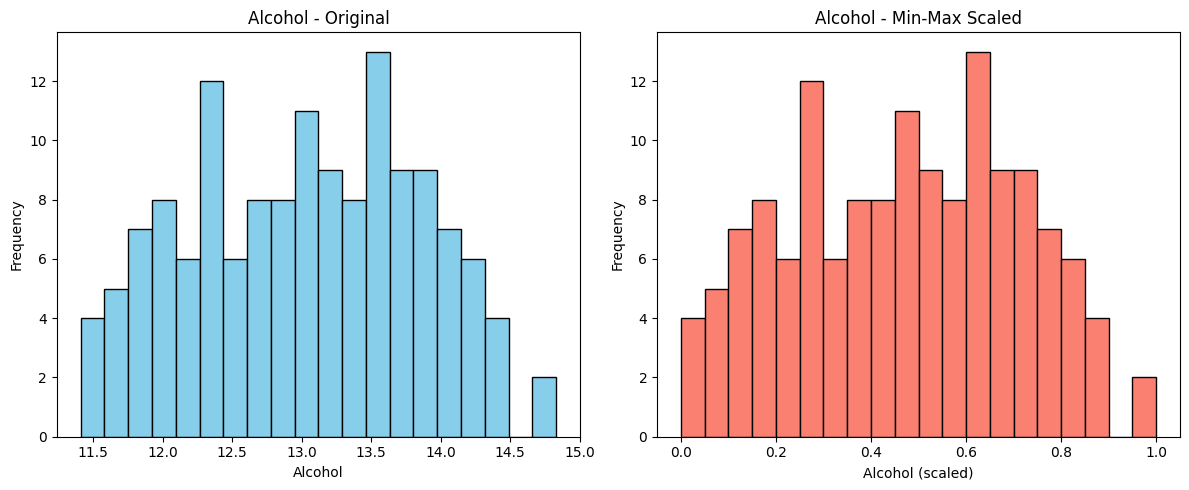

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load Wine dataset

df_wine.columns = [
    'Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
    'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
    'Proanthocyanins', 'Color intensity', 'Hue',
    'OD280/OD315 of diluted wines', 'Proline'
]

# Features and labels
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# Step 1: Apply Min-Max scaling
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

print("First two rows of scaled training data:\n", X_train_norm[:2])

# Step 2: Plot histograms before and after scaling for a feature (e.g., 'Alcohol')
feature_idx = 0  # 'Alcohol' column

plt.figure(figsize=(12,5))

# Original feature histogram
plt.subplot(1,2,1)
plt.hist(X_train[:, feature_idx], bins=20, color='skyblue', edgecolor='black')
plt.title('Alcohol - Original')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')

# Scaled feature histogram
plt.subplot(1,2,2)
plt.hist(X_train_norm[:, feature_idx], bins=20, color='salmon', edgecolor='black')
plt.title('Alcohol - Min-Max Scaled')
plt.xlabel('Alcohol (scaled)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


exercise 4.2

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


df_wine.columns = [
    'Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
    'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
    'Proanthocyanins', 'Color intensity', 'Hue',
    'OD280/OD315 of diluted wines', 'Proline'
]

# Features and labels
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# Step 1: Standardization (Z-score scaling)
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

print("First two rows of standardized training data:\n", X_train_std[:2])

# Step 2: Check mean and std of scaled features
print("\nMean of each feature (train):", np.mean(X_train_std, axis=0))
print("Std of each feature (train):", np.std(X_train_std, axis=0))


First two rows of standardized training data:
 [[-1.45083563 -1.27985582  0.74306024 -0.49136511 -0.37078043 -0.15558334
   0.17965734 -1.20822065  1.29150989 -0.84486398 -0.74910758  0.66674895
  -0.71247369]
 [ 1.34746381 -0.75756493 -0.2118226  -0.84257574 -0.29683265 -0.15558334
   0.39838279 -0.87620839 -0.0490171  -0.00656951  0.99652401  0.29506888
   1.63245344]]

Mean of each feature (train): [-2.00387437e-15 -1.32914024e-16 -1.53711160e-15  1.23922781e-16
 -1.64187912e-16 -7.28681591e-16  1.17530951e-15 -1.12317237e-15
 -4.88996558e-16  2.43936327e-16  6.94475776e-16  1.25642845e-15
  1.23531858e-16]
Std of each feature (train): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Standardization (Z-score scaling) is preferred when features have very different scales and you are using algorithms that rely on distances, like K-Nearest Neighbors, Support Vector Machines, or K-Means clustering. It is also useful when your model assumes features are normally distributed, such as in linear or logistic regression, or when performing PCA. Standardization centers the data around zero and scales it to unit variance, making all features contribute equally to the model.

In contrast, normalization (Min-Max scaling) is better when you need the features to be bounded within a specific range, like [0,1], which is often useful for neural networks.

Exercise 5.1

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

Training accuracy: 1.0
Test accuracy: 1.0
Coefficients:
 [[ 1.28553356  0.17447839  0.75993878 -1.25749379  0.          0.
   1.23071108  0.          0.          0.          0.          0.59028461
   2.59843187]
 [-1.529198   -0.48608609 -1.09012312  0.58285307  0.          0.
   0.56955698  0.0731614   0.08565922 -2.1223143   1.00642468  0.
  -2.3208551 ]
 [ 0.16099473  0.14027105  0.54353192  0.          0.          0.
  -2.43989997  0.          0.          1.80372257 -1.0645274  -0.46586045
   0.        ]]


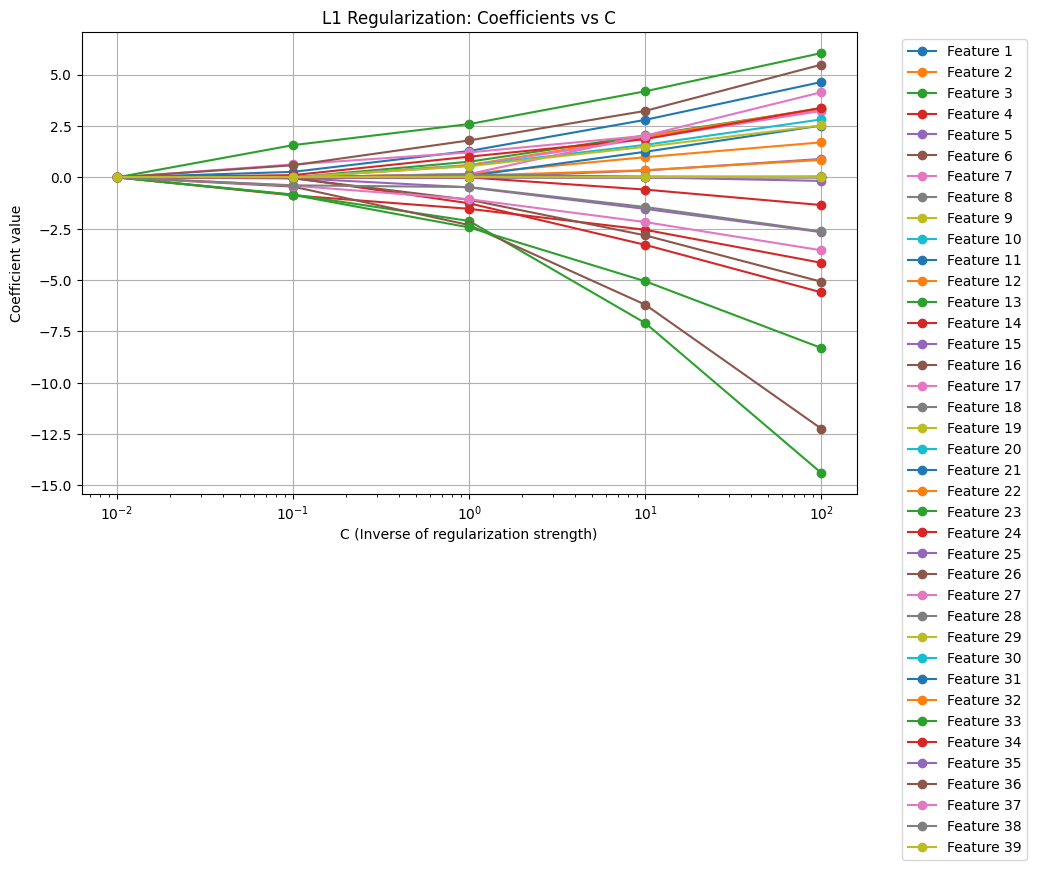

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

# Load Wine dataset
df_wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
    header=None
)

df_wine.columns = [
    'Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
    'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
    'Proanthocyanins', 'Color intensity', 'Hue',
    'OD280/OD315 of diluted wines', 'Proline'
]

# Features and labels
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# Standardize features
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# Step 1: Train L1 Logistic Regression with C=1.0
lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)

print("Training accuracy:", lr.score(X_train_std, y_train))
print("Test accuracy:", lr.score(X_test_std, y_test))
print("Coefficients:\n", lr.coef_)

# Step 2: Vary C to observe sparsity
C_values = [0.01, 0.1, 1, 10, 100]
coefs = []

for c in C_values:
    lr_c = LogisticRegression(penalty='l1', C=c, solver='liblinear', multi_class='ovr')
    lr_c.fit(X_train_std, y_train)
    coefs.append(lr_c.coef_.ravel())

coefs = np.array(coefs)

# Step 3: Plot coefficients vs C
plt.figure(figsize=(10,6))
for i in range(coefs.shape[1]):
    plt.plot(C_values, coefs[:, i], marker='o', label=f'Feature {i+1}')

plt.xscale('log')
plt.xlabel('C (Inverse of regularization strength)')
plt.ylabel('Coefficient value')
plt.title('L1 Regularization: Coefficients vs C')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


exercise 5.2

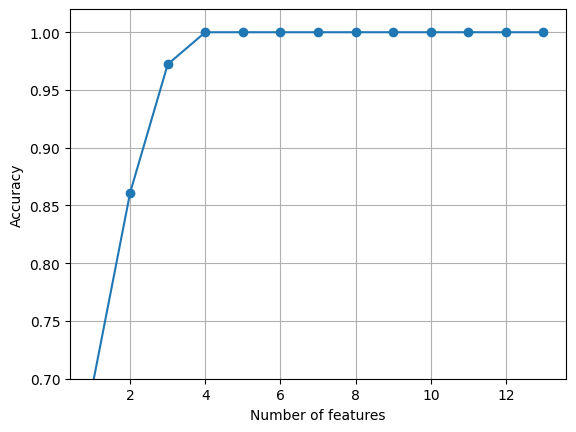

Selected features: Index(['Alcohol', 'Malic acid', 'Alcalinity of ash'], dtype='object')
Test accuracy with selected features: 0.7777777777777778


In [13]:
import numpy as np
from itertools import combinations
from sklearn.base import clone
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Load Wine dataset
df_wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
    header=None
)

df_wine.columns = [
    'Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
    'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
    'Proanthocyanins', 'Color intensity', 'Hue',
    'OD280/OD315 of diluted wines', 'Proline'
]

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# Standardize features
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# --- SBS Class ---
class SBS():
    def __init__(self, estimator, k_features, scoring='accuracy', test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=self.test_size, random_state=self.random_state, stratify=y)

        n_features = X_train.shape[1]
        self.indices_ = tuple(range(n_features))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]

        while n_features > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, n_features - 1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            self.scores_.append(scores[best])
            n_features -= 1

        self.k_score_ = self.scores_[-1]
        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        return np.mean(y_pred == y_test)

# --- Step 1: Apply SBS ---
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# Step 2: Plot accuracy vs number of features
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

# Step 3: Selected features (example: 3 features)
k3 = list(sbs.subsets_[10])  # Choose subset with 3 features
print("Selected features:", df_wine.columns[1:][k3])

# Step 4: Performance with selected features
knn.fit(X_train_std[:, k3], y_train)
print('Test accuracy with selected features:', knn.score(X_test_std[:, k3], y_test))


Exercise 5.3

Feature importances (sorted):
 1) Proline                        0.165062
 2) Flavanoids                     0.153049
 3) Alcohol                        0.148701
 4) Color intensity                0.147467
 5) OD280/OD315 of diluted wines   0.115371
 6) Hue                            0.073462
 7) Total phenols                  0.071435
 8) Malic acid                     0.031434
 9) Alcalinity of ash              0.027576
10) Magnesium                      0.025276
11) Proanthocyanins                0.020124
12) Nonflavanoid phenols           0.011265
13) Ash                            0.009777


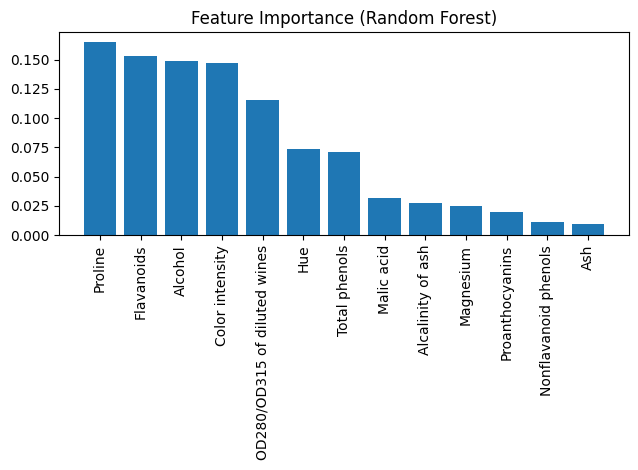


Selected features (importance > 0.1): Index(['Alcohol', 'Flavanoids', 'Color intensity',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')
Test accuracy with selected features: 0.7222222222222222


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

# Load Wine dataset
df_wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
    header=None
)

df_wine.columns = [
    'Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
    'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
    'Proanthocyanins', 'Color intensity', 'Hue',
    'OD280/OD315 of diluted wines', 'Proline'
]

# Features and labels
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

feat_labels = df_wine.columns[1:]

# Step 1: Fit Random Forest
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)

# Step 2: Feature importances
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances (sorted):")
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

# Step 3: Plot feature importances
plt.title('Feature Importance (Random Forest)')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

# Step 4: Select features with threshold=0.1
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

print("\nSelected features (importance > 0.1):", feat_labels[sfm.get_support()])

# Step 5: Train KNN on selected features
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_selected, y_train)
print("Test accuracy with selected features:", knn.score(X_test_selected, y_test))


Compare with SBS

SBS (Sequential Backward Selection) selects features based on classifier performance.

RF selects features based on intrinsic importance.

You may see some overlap (e.g., Flavanoids, OD280/OD315) but the ranking/order may differ.

Conclusion


Data preprocessing is essential in machine learning. Handling missing values ensures complete and consistent datasets, while encoding categorical features allows models to interpret them correctly. Feature scaling, through normalization or standardization, improves the performance of distance- and gradient-based algorithms. For feature selection, L1 regularization, SBS, and Random Forests help identify important features, reduce overfitting, and simplify models. Applying these techniques to other datasets, like Iris, shows that proper preprocessing consistently enhances model performance, stability, and interpretability.


Why is handling missing data important?

Missing values can lead to errors or biased predictions in models. Proper handling ensures the model is trained on complete and reliable data. Techniques like imputation or row/column removal prevent inaccurate learning.

When should you use one-hot encoding vs. label encoding?

One-hot encoding: For nominal features with no intrinsic order (e.g., color), prevents models from assuming numeric relationships.

Label encoding: For ordinal features (e.g., size: S < M < L) or class labels, where order matters.

How does feature scaling impact algorithms like KNN or SVM?

Scaling ensures all features contribute equally. In KNN, distance calculations depend on scale, so unscaled features with large magnitudes dominate. In SVM, feature scale affects the margin calculation. Standardization or normalization improves model performance and convergence.

Compare L1 regularization and SBS for feature selection.

L1 regularization: Automatically shrinks coefficients to zero based on regularization strength; fast and integrated into model training.

SBS: Iteratively removes features to find a subset that maximizes performance; model-agnostic but computationally expensive. Both aim to reduce dimensionality and overfitting but use different strategies.